In [2]:
#on the day 15 we will do life expectancy predicition
#the data is taken from kaggle
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Load the dataset
df = pd.read_csv(r"C:\Users\parin\Downloads\Life Expectancy Data.csv")

# Check first few rows
print(df.head())

# Dataset shape
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Data types and missing values
print(df.info())

# Count of missing values
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

✅ Summary of What We Found
🔢 Rows & Columns: 2938 rows × 22 columns

🎯 Target column: Life expectancy (confirmed ✅)

❗ Missing Values: Present in many columns — including Population, Hepatitis B, GDP, Total expenditure, etc.

🏷️ Categorical columns:

Country — high cardinality

Status — needs encoding (Developed/Developing)

🔄 Duplicate / Redundant Columns:

thinness 1-19 years and thinness 5-9 years seem related

infant deaths and under-five deaths are similar

🔬 Some columns might require renaming due to inconsistent spacing ( thinness 5-9 years has extra spaces)

In [4]:
#Lets remove extra spaces in column names
df.columns = df.columns.str.strip()

In [9]:
#Hadeling missing values
# Drop rows with missing target
df = df.dropna(subset=['Life expectancy', 'Adult Mortality'])

# Fill missing numerical values with median
for col in df.select_dtypes(include=[np.number]).columns:
   df[col] = df[col].fillna(df[col].median())

In [10]:
#Now we will encode categorical variables
# Convert categorical variables to numerical using one-hot encoding
df['Status'] = df['Status'].map({'Developing':0, 'Developed':1})

In [11]:
#country has too high cardinality so we will drop it
df = df.drop(columns = 'Country')

In [13]:
#final check after cleaning
df.isnull().sum().sort_values(ascending=False)

Year                               0
Polio                              0
Income composition of resources    0
thinness 5-9 years                 0
thinness  1-19 years               0
Population                         0
GDP                                0
HIV/AIDS                           0
Diphtheria                         0
Total expenditure                  0
under-five deaths                  0
Status                             0
BMI                                0
Measles                            0
Hepatitis B                        0
percentage expenditure             0
Alcohol                            0
infant deaths                      0
Adult Mortality                    0
Life expectancy                    0
Schooling                          0
dtype: int64

In [14]:
#We have cleaned the dataset by removing extra spaces in column names, handling missing values, encoding categorical variables, and dropping the 'Country' column due to high cardinality. The dataset is now ready for further analysis or modeling.

#now we will move to eda
#in this we will We'll explore:

Basic Distributions

Correlation with Life Expectancy

Feature Relationships

Outliers (Optional)

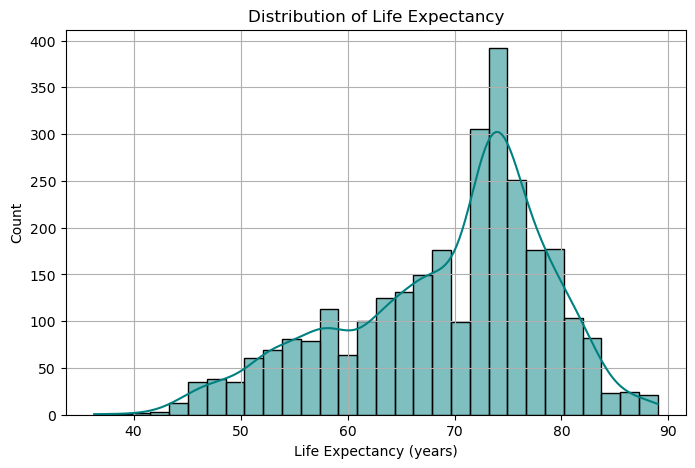

In [16]:
#duistribution of life expectancy
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Life expectancy'], kde=True, bins=30, color='teal')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


<Axes: >

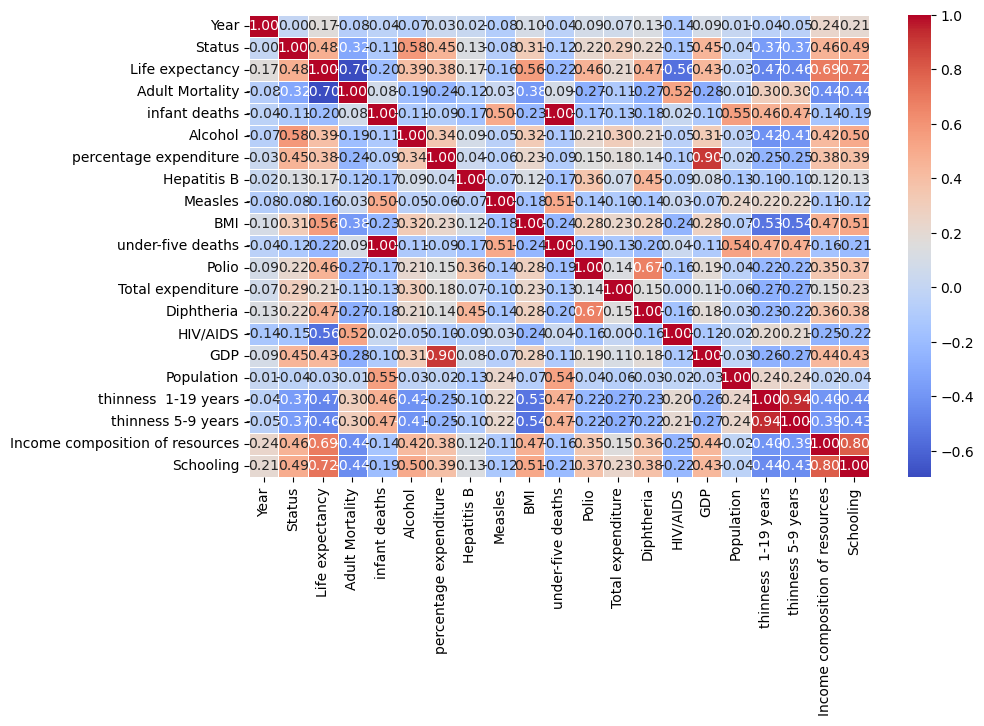

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only= True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

In [18]:
#top positive and negative correlations
# Sort features by correlation with Life expectancy
corr = df.corr()
corr_target = corr['Life expectancy'].sort_values(ascending=False)
print("Top positive correlations:\n", corr_target.head(10))
print("\nTop negative correlations:\n", corr_target.tail(10))


Top positive correlations:
 Life expectancy                    1.000000
Schooling                          0.717314
Income composition of resources    0.688591
BMI                                0.558888
Status                             0.482136
Diphtheria                         0.473268
Polio                              0.459458
GDP                                0.430991
Alcohol                            0.390674
percentage expenditure             0.381864
Name: Life expectancy, dtype: float64

Top negative correlations:
 Hepatitis B             0.171255
Year                    0.170033
Population             -0.028842
Measles                -0.157586
infant deaths          -0.196557
under-five deaths      -0.222529
thinness 5-9 years     -0.462645
thinness  1-19 years   -0.467859
HIV/AIDS               -0.556556
Adult Mortality        -0.696359
Name: Life expectancy, dtype: float64


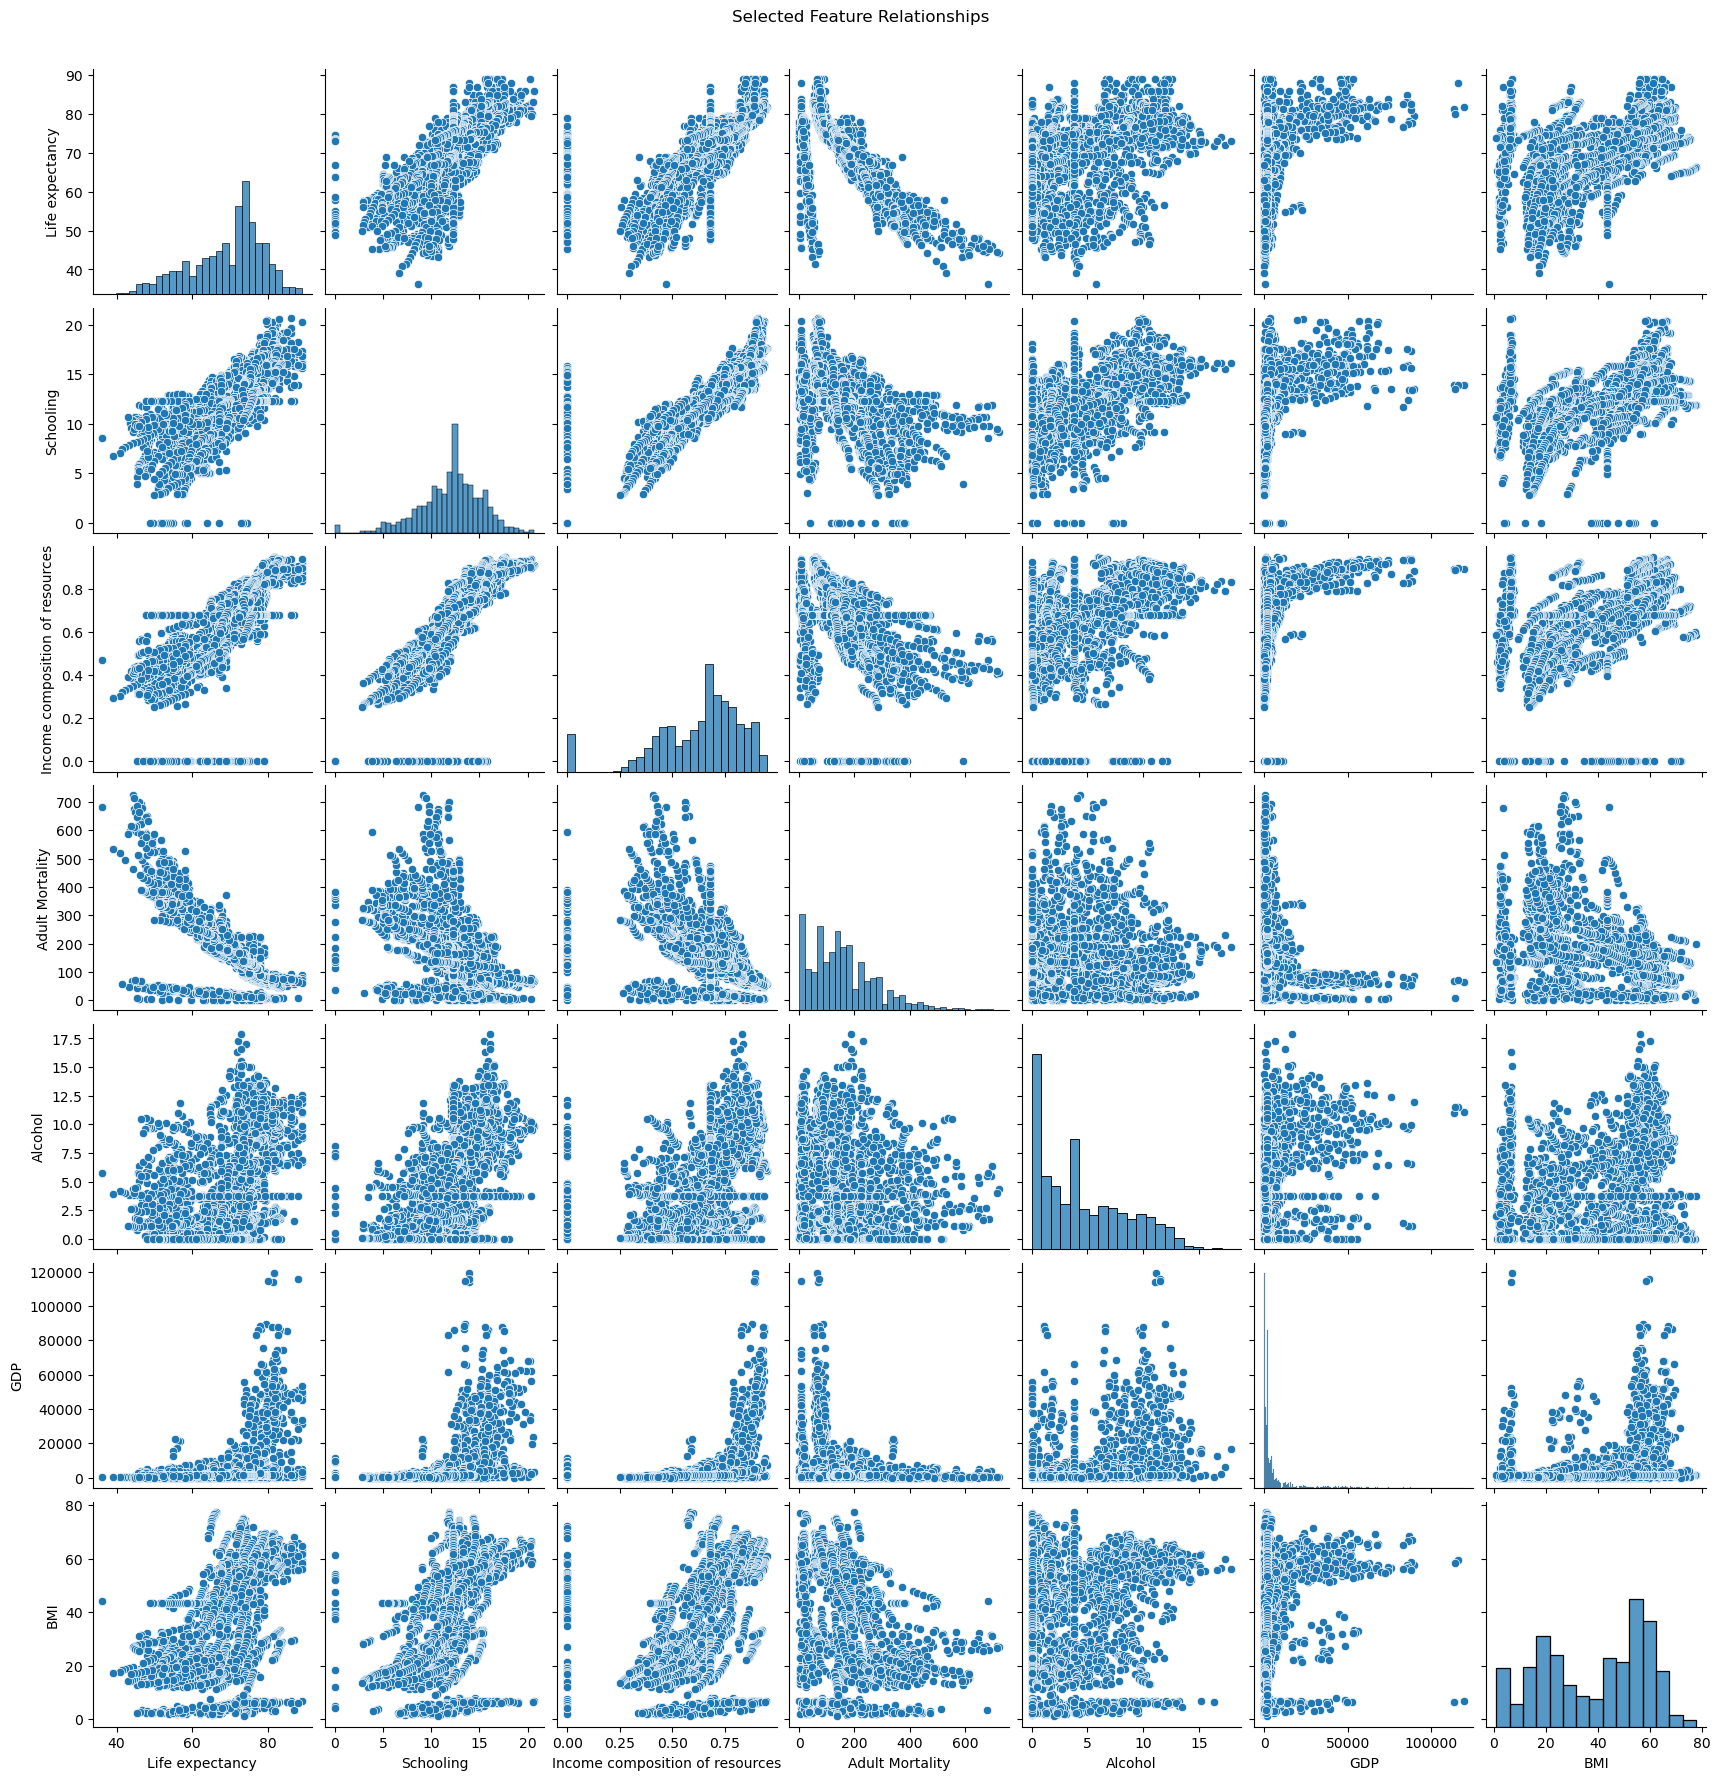

In [ ]:
selected_features = ['Life expectancy', 'Schooling', 'Income composition of resources', 
                     'Adult Mortality', 'Alcohol', 'GDP', 'BMI']

sns.pairplot(df[selected_features])
plt.suptitle('Selected Feature Relationships', y=1.02)
plt.show()


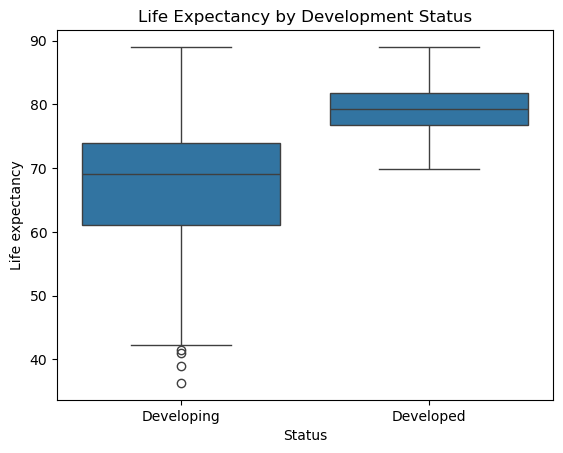

In [20]:
sns.boxplot(x='Status', y='Life expectancy', data=df)
plt.xticks([0, 1], ['Developing', 'Developed'])
plt.title('Life Expectancy by Development Status')
plt.show()


In [21]:
#developed states clearly have more life expectancy than developing states

In [22]:
#now lets move to feature selection and model building   
#We’ll use the features most strongly correlated with Life expectancy. 
selected_features = [
    'Schooling',
    'Income composition of resources',
    'BMI',
    'Status',
    'Diphtheria',
    'Polio',
    'GDP',
    'Alcohol',
    'percentage expenditure',
    'HIV/AIDS',
    'Adult Mortality',
    'thinness 5-9 years',
    'thinness  1-19 years'
]
# We will use these features for our model


In [23]:
X = df[selected_features]
y = df['Life expectancy']


In [24]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} - R² Score: {r2:.3f}, RMSE: {rmse:.2f}")

# Print evaluation
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)


Linear Regression - R² Score: 0.809, RMSE: 4.06
Ridge Regression - R² Score: 0.809, RMSE: 4.06
Lasso Regression - R² Score: 0.800, RMSE: 4.16


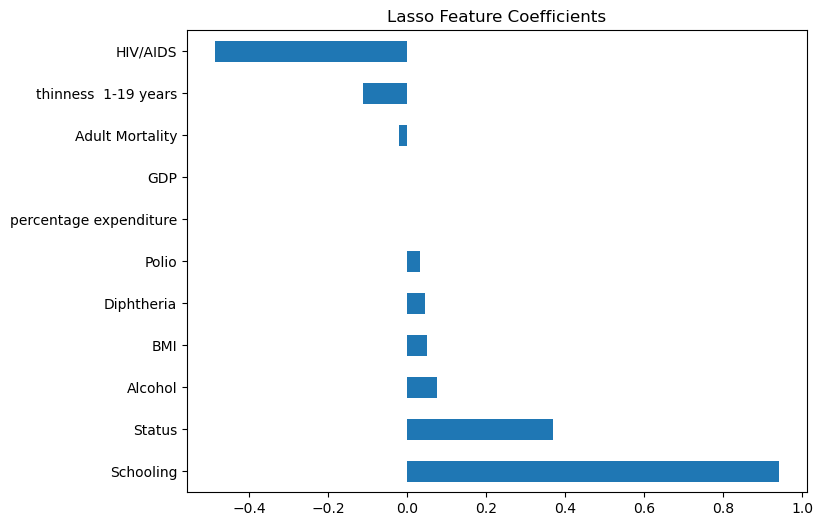

In [27]:
#lasso feature importance
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
lasso_coef[lasso_coef != 0].sort_values(ascending=False).plot(kind='barh', figsize=(8,6), title="Lasso Feature Coefficients")
plt.show()


In [28]:
#trying more advanced modelsfrom sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
evaluate_model("Random Forest", y_test, y_pred_rf)


Random Forest - R² Score: 0.964, RMSE: 1.78


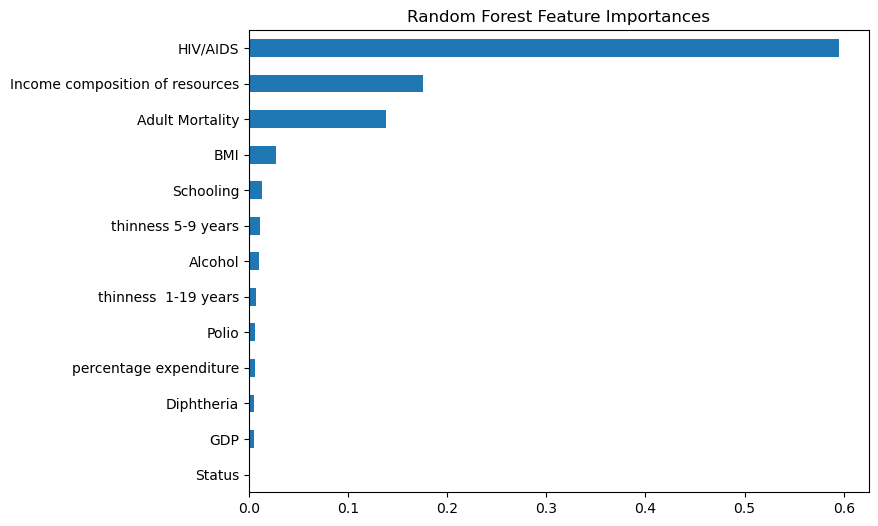

In [29]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6), title="Random Forest Feature Importances")
plt.show()


To check overfitting


In [30]:
# Predict on training data
y_train_pred_rf = rf.predict(X_train)

# Evaluate on training set
evaluate_model("Random Forest (Train)", y_train, y_train_pred_rf)

# Evaluate on test set (already done)
evaluate_model("Random Forest (Test)", y_test, y_pred_rf)


Random Forest (Train) - R² Score: 0.994, RMSE: 0.72
Random Forest (Test) - R² Score: 0.964, RMSE: 1.78


In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean CV R²:", scores.mean())


Cross-validated R² scores: [0.94024753 0.88594432 0.91817919 0.91833846 0.90775104]
Mean CV R²: 0.9140921081268061


In [ ]:
#great